In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import random
image = cv2.imread('forma.png', cv2.IMREAD_GRAYSCALE)

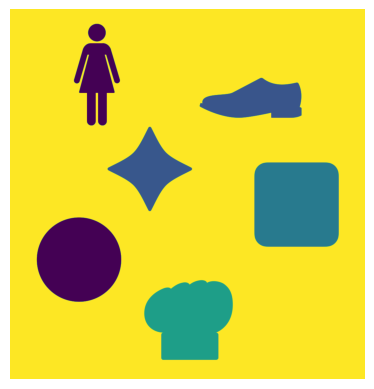

In [4]:
plt.imshow(image) 
plt.axis('off')  
plt.show()

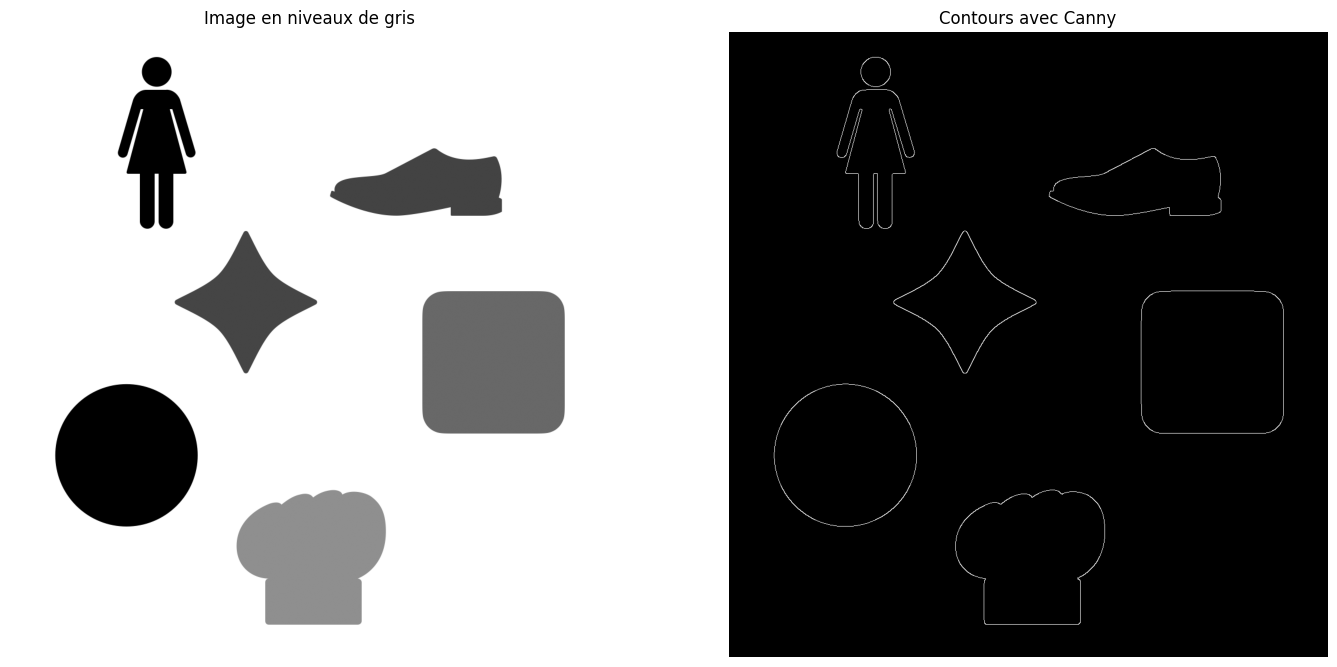

In [5]:
edges = cv2.Canny(image, 10, 200)

plt.figure(figsize=(17, 9))
plt.subplot(1, 2, 1)
plt.title('Image en niveaux de gris')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Contours avec Canny')
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

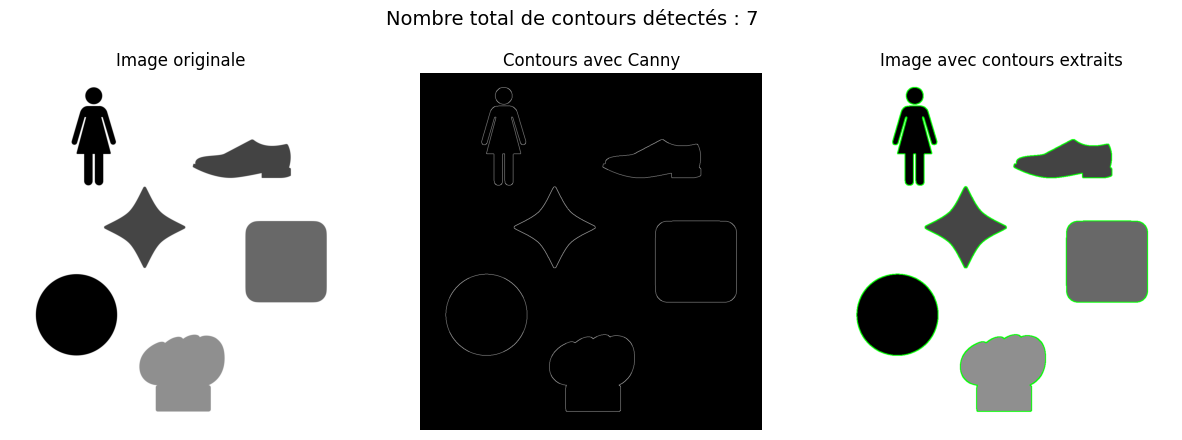

In [6]:
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_with_contours = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Image originale')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title('Contours avec Canny')
plt.imshow(edges, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title('Image avec contours extraits')
plt.imshow(image_with_contours)
plt.axis("off")

plt.suptitle(f"Nombre total de contours détectés : {len(contours)}", fontsize=14)
plt.show()

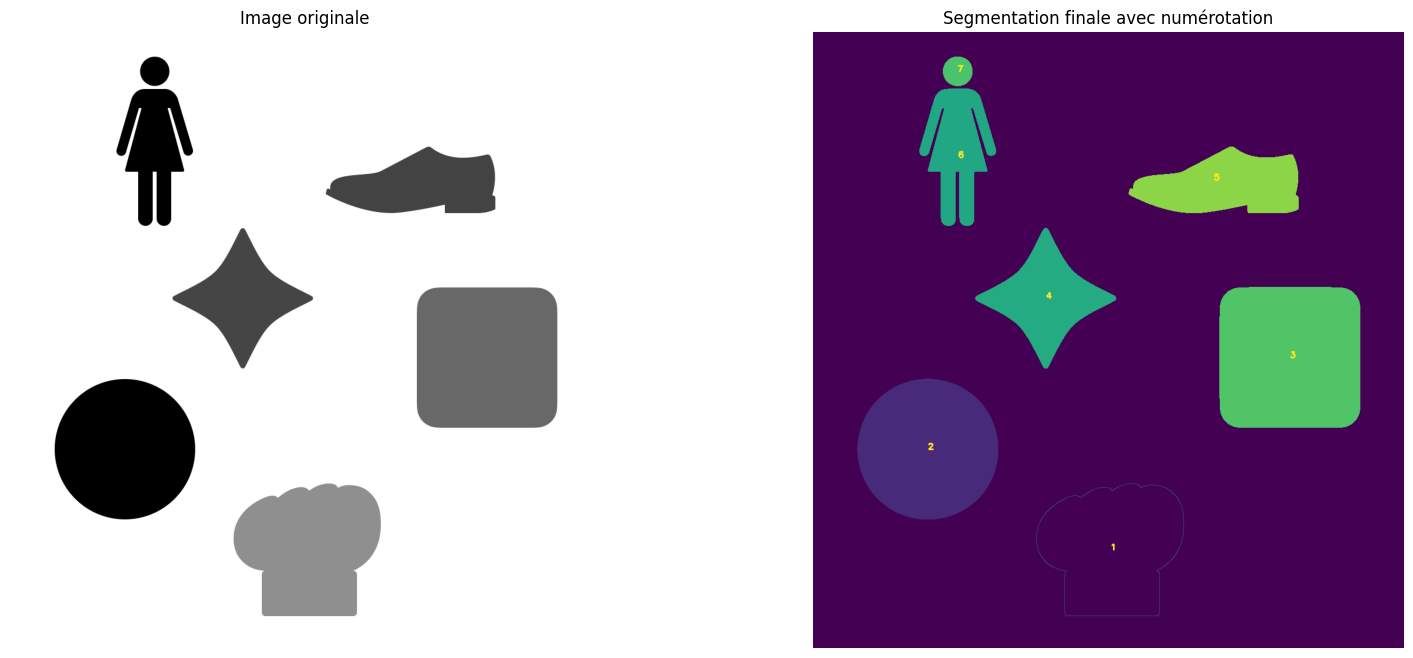

In [7]:
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

segmentation = np.zeros_like(image)
image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

for i, contour in enumerate(contours):
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

    cv2.drawContours(segmentation, [contour], -1, color, thickness=cv2.FILLED)

    x, y, w, h = cv2.boundingRect(contour)

    cX = x + w // 2
    cY = y + h // 2

    cv2.putText(segmentation, str(i + 1), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

plt.figure(figsize=(19, 8))

plt.subplot(1, 2, 1)
plt.title('Image originale')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmentation finale avec numérotation')
plt.imshow(segmentation)
plt.axis('off')

plt.show()